#1. Tortoise and Hare, Linear Function


In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [14]:
tortois_speed = 1 #@param {type:"slider", min:0, max:10, step:1}
tortois_bias = 4 #@param {type:"slider", min:0, max:10, step:1}
hare_speed = 2 #@param {type:"slider", min:0, max:10, step:1}

MAXVAL = 10
INTERVAL = (MAXVAL*10) + 1
doMeet = False
t_xdata, t_ydata, h_xdata, h_ydata = [], [], [], []

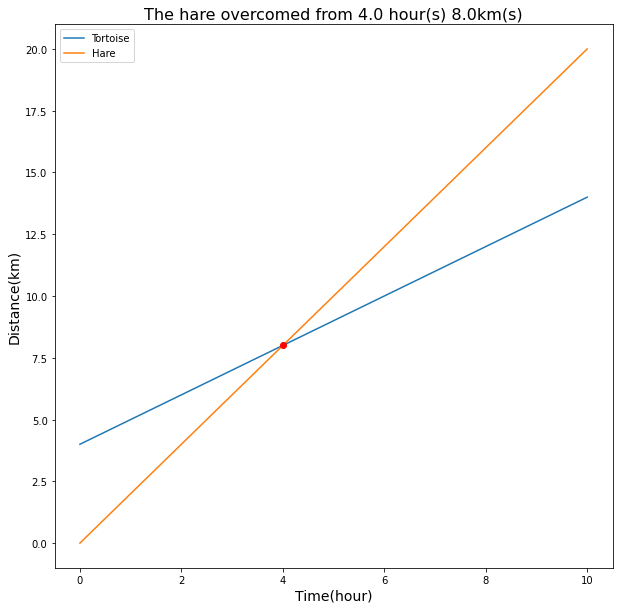

In [15]:
# Configure figure size
plt.figure(figsize=(10,10))

for t in np.linspace(0,MAXVAL,INTERVAL):
  t_y = tortois_speed*t + tortois_bias
  h_y = hare_speed*t
  t_xdata.append(t)
  t_ydata.append(t_y)
  h_xdata.append(t)
  h_ydata.append(h_y)
  if (h_y>=t_y) and (not doMeet):
    doMeet = True
    meet_time = t
    meet_distance = t_y 

plt.plot(t_xdata, t_ydata, label='Tortoise')
plt.plot(h_xdata, h_ydata, label='Hare')

if doMeet:
  plt.title("The hare overcomed from " + str(math.ceil(meet_time*100)/100) + " hour(s) " + str(math.ceil(meet_distance*100)/100) + "km(s)", fontsize=16)
  plt.plot(meet_time, meet_distance, 'ro')
else:
  plt.title("They will not meet", fontsize=16)

plt.xlabel("Time(hour)", fontsize=14)
plt.ylabel("Distance(km)", fontsize=14)
plt.legend()

# show plot
plt.show()

#2. Tensorflow

In [16]:
import tensorflow as tf

In [17]:
learning_rate = 0.01
learning_epochs = 500

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

# Stochastic Gradient Descent (SGD) Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model.compile(loss=mse, optimizer=sgd)

In [19]:
# prints summary of the model to the terminal
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Model Training

In [20]:
# The tortoise learning
t_history = model.fit(t_xdata, t_ydata, epochs=learning_epochs)

Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 5.9990
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 3.7408
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 3.6811
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 3.5490
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 3.3566
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 3.1704
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 3.1588
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 2.9597
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 2.8396
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 2.7248
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 2.6357
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 2.5228
Epoch 13/500
4/4 [==============================] - 0s 5ms/st

In [ ]:
# The hare learning
h_history = model.fit(h_xdata, h_ydata, epochs=learning_epochs)

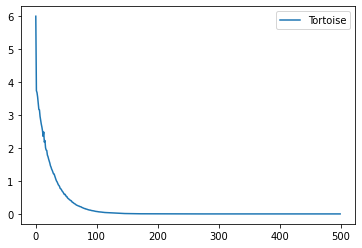

In [21]:
plt.plot(t_history.history['loss'], label='Tortoise')
# plt.plot(h_history.history['loss'], label='Hare')

plt.legend()
plt.show()

Prediction

In [22]:
result = model.predict([10])
print(result)

[[14.000082]]


In [23]:
p_ydata = model.predict(t_xdata)

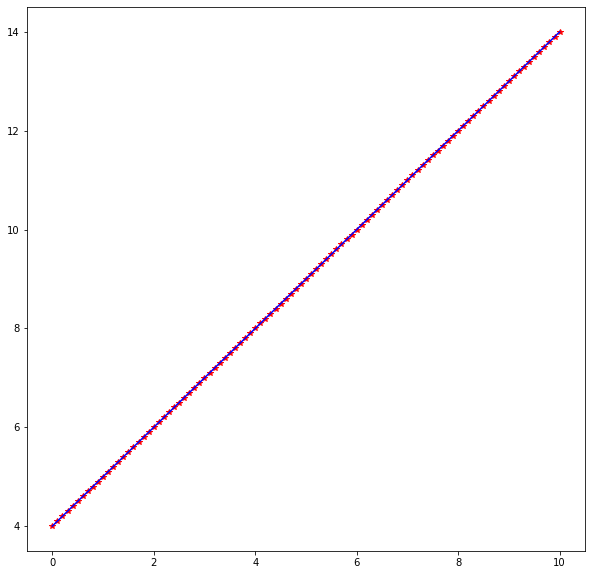

In [24]:
# configure figure size
plt.figure(figsize=(10,10))

plt.plot(t_xdata, t_ydata, 'r*')
plt.plot(t_xdata, p_ydata, color='b')
# plt.plot(h_xdata, h_ydata, 'r*')
# plt.plot(h_xdata, p_ydata, color='b')

plt.show()